<br>
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h2 align='center'>  Maquinas de Soporte Vectorial </h2>

---

# Aspectos teóricos

## Introducción

Las **Máquinas de Vector Soporte (Vector Support Machines, SVM)** es un algoritmo de clasificación y regresión desarrollado en la década de los 90, dentro del campo de la ciencia computacional. Aunque inicialmente se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.

Más formalmente, una SVM construye un hiperplano o conjunto de hiperplanos en un espacio de dimensionalidad muy alta que puede ser utilizado en problemas de clasificación o regresión. Una buena separación entre las clases permitirá una clasificación correcta.

Comprender los fundamentos de las SVMs requiere de conocimientos sólidos en álgebra lineal y optimización. En este documento no se profundizará en los aspectos matemáticos

## Hiperplano Separador

La definición matemática de un hiperplano es bastante simple. En el caso de dos dimensiones, el hiperplano se describe acorde a la ecuación de una recta:

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0 $$

Todos aquellos pares ordenados $x = (x_1,x_2)$ para los cuales se cumple la igualdad, son puntos que están en el hiperplano. De forma más general en el caso n dimensional tenemos:

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2+\ldots+ \beta_n x_n = 0 $$

y de igual manera, todos los puntos definidos por el vector $x= (x_1,x_2,\ldots,x_n)$ que satisfacen la ecuación del hiperplano.

Si un punto $x$ no satisface la ecuación, 

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2+\ldots+ \beta_n x_n > 0 $$

o bien

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2+\ldots+ \beta_n x_n <0 $$


entonces ese punto $x$ debe encontrarse en algunas de las regiones que separa este plano, es decir, cae a un lado u otro del hiperplano.

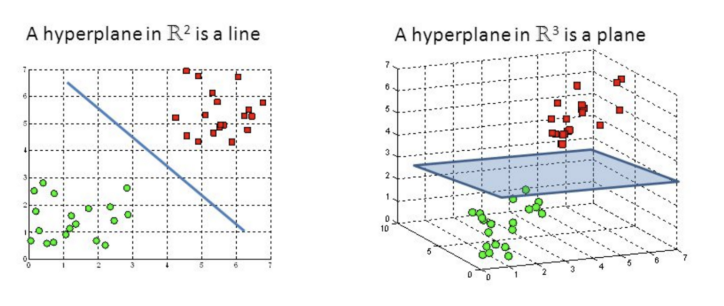

<div style="text-align: center"> Ejemplos de hiperplanos </div>

## Clasificación binaria usando hiperplanos

Si las observaciones están distribuidas de tal manera que se pueda **separar perfectamente** en dos clases (+1, -1) por un hiperplano, entonces este hiperplano cumple que:

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2+\ldots+ \beta_n x_n > 0 \mbox{ si }y_i =1 $$


$$\beta_0 + \beta_1 x_1 + \beta_2 x_2+\ldots+ \beta_n x_n < 0 \mbox{ si }y_i =-1 $$

De esta manera un clasificador sencillo para este conjunto sería el siguiente:

$$f(x^{*}) = 
\beta_0 + \beta_1 x_1^{*} + \beta_2 x_2^{*}  +\ldots+ \beta_n x_n^{*} $$

que asigna +1 a la clase de $x^{*}$ si $f(x^{*})>0$ y -1 en caso contrario.

Cuando los conjuntos pueden separarse perfectamente por un hiperplano ocurre un problema y es que existen infinitos hiperplanos que pueden separar a ambas regiones, esto hace necesario que exista un método que permita seleccionar entre todos estos planos aquel que sea óptimo y genere el mayor margen de sesparación posible entre las clases.


## Hiperplano de óptima separación

La solución al problema descrito anteriormente consiste en seleccionar como clasificador óptimo el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. A este se le conoce como **maximal margin hyperplane o hiperplano óptimo de separación**. Para identificarlo, se tiene que calcular la distancia perpendicular de cada observación a un determinado hiperplano.

Los pasos básicos para resolver el problema serían:
1. Seleccionar dos hiperplanos que separen los datos sin puntos entre ellos.
2. Maximizar su margen.
3. Encontrar la linea promedio que está a la mitad  de ambos vectores de apoyo creados en el paso 1. Esta línea se llama **límite de decisión**

$$\mbox{ max }\Bigg(\frac{2}{||w||}\Bigg) \mbox{ s.a } y_i(wx_i+b)\ge 1$$

En la práctica es más fácil minimizar el término recíproco $\frac{1}{2}||w||^{2}$, el cual puede sesr resuelto como un problema de programación cuadrática, el cual no abordaremos acá.


## Casos que no son linealmente separables

El Support Vector Classifier, que es otra forma de definir el método descrito en el apartado anterior, consigue buenos resultados cuando el límite de separación entre clases es aproximadamente lineal. Si no lo es, su capacidad decae drásticamente. Una estrategia para enfrentarse a escenarios en los que la separación de los grupos es de tipo no lineal consiste en expandir las dimensiones del espacio original.

El hecho de que los grupos no sean linealmente separables en el espacio original no significa que no lo sean en un espacio de mayores dimensiones. Las imágenes siguientes muestran dos grupos cuya separación en dos dimensiones no es lineal, pero sí lo es al añadir una tercera dimensión.

<!--<img align="center" src="imagenes/separacion_no_lineal.png"  width="400" height="400">

<img align="center" src="imagenes/separacion_no_lineal2.png"  width="400" height="400">-->

El **método de Máquinas Vector Soporte (SVM)** se puede considerar como una extensión del Support Vector Classifier obtenida al aumentar la dimensión de los datos. Los límites de separación lineales generados en el espacio aumentado se convierten en límites de separación no lineales al proyectarlos en el espacio original.

### Truco del kernel para encontrar hiperplanos separadores

Un **kernel (K)** es una función que devuelve el resultado del producto escalar entre dos vectores realizado en un nuevo espacio dimensional distinto al espacio original en el que se encuentran los vectores. Aunque no se ha entrado en detalle en las fórmulas matemáticas empleadas para resolver el problema de optimización, esta contiene un producto escalar. Si se sustituye este producto escalar por un kernel, se obtienen directamente los vectores soporte (y el hiperplano) en la dimensión correspondiente al kernel. Ha esto se le suele conocer como **kernel trick o truco del kernel**, porque con solo una ligera modificación del problema original, se puede obtener el resultado para cualquier dimensión. Existen multitud de kernels distintos, algunos de los más utilizados son:

* **Kernel lineal**
$$K(x,x') = x.x'$$

* **Kernel polinómico**
$$K(x,x') = (x.x'+c)^{d}$$

Cuando se emplea  $d = 1$  y  $c = 0$ , el resultado es el mismo que el de un kernel lineal. Si  $d > 1$ , se generan límites de decisión no lineales, aumentando la no linealidad a medida que aumenta  $d$ . No suele ser recomendable emplear valores de  d  mayores 5 por problemas de overfitting.

* **Kernel Gaussiano (RBF)**

$$K(x,x') = e^{-\gamma ||x-x'||^2})$$

El valor de  γ  controla el comportamiento del kernel, cuando es muy pequeño, el modelo final es equivalente al obtenido con un kernel lineal, a medida que aumenta su valor, también lo hace la flexibilidad del modelo.

Los kernels descritos son solo unos pocos de los muchos que existen. Cada uno tiene una serie de hiperparámetros cuyo valor óptimo puede encontrarse mediante validación cruzada. No puede decirse que haya un kernel que supere al resto, depende en gran medida de la naturaleza del problema que se esté tratando. Es muy recomendable probar el kernel RBF, este kernel tiene dos ventajas: que solo tiene dos hiperparámetros que optimizar ( $\gamma$ γ  y la penalización  $C$  común a todos los SVM) y que su flexibilidad puede ir desde un clasificador lineal a uno muy complejo.

<h2> Mapa </h2>
<ul>
    <li>1-. Formular la pregunta y determinar los datos requeridos</li>
    <li>2-. Adquirir los datos en un formato accesible</li>
    <li>3-. Identifique y corrija los puntos de datos faltantes/anomalías según sea necesario</li>
    <li>4-. Preparar los datos para el modelo de aprendizaje automático</li>
    <li>5-. Entrenar el modelo en los datos de entrenamiento</li>
    <li>6-. Predicciones sobre los datos de prueba</li>
    <li>7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento</li>
    <li>8-. Reducción de caracteristicas, si el modelo no fue satisfactorio</li>
    <li>9-. Interpretación el modelo y reporte los resultados visual y numéricamente</li>
</ul>

# 2-. Adquisición de datos

Primero, necesitamos algunos datos. Para usar un ejemplo realista, recuperé datos de pacientes del Hospital Herminda Martin de Chillan. En general, aproximadamente el 80 % del tiempo dedicado al análisis de datos es limpiar y recuperar datos, pero esta carga de trabajo se puede reducir encontrando fuentes de datos de alta calidad.

In [28]:
# Libreria para la manipulación de los datos
import pandas as pd
import numpy as np

# Leer el dataframe
dataframe = pd.read_excel('../bdd/dataframe.xlsx')
dataframe.head(5)

,CLAVE,COMUNA,TELEFONOS,FICHA CLINICA,CTA CTE,EDAD,PESO,TALLA,HTA,DIABETES,...,logVEGF,logPlGF,logPCR,PCR/VEGF ratio,PCR/PLGF ratio,IL-6 (pg/ml),IL-6 corregida,log IL-6,IL-6/VEGF,IL-6/PlGF
0,1,san carlos,NaN,2012418042,11998898,53.0,NaN,NaN,NaN,NaN,...,1.768165,0.973961,0.170262,0.096293,0.174814,18.586835,0.156953,-0.804231,-0.454840,-0.825732
1,2,coihueco,41723921-74822219,2000149601,12002852,54.0,88.0,165.0,si,si,...,2.143150,1.749737,0.222716,0.103920,0.127286,1.263441,0.012818,-1.892186,-0.882899,-1.081411
2,3,chillan,71818219-50323843,98085992,12003092,78.0,NaN,NaN,si,si,...,1.560877,1.213371,1.083144,0.693933,0.892673,49.091862,0.436365,-0.360150,-0.230736,-0.296817
3,4,coihueco,77107584-93406930,9772094,11995391,87.0,52.5,NaN,si,si,...,2.254849,1.660278,0.060698,0.026919,0.036559,96.544126,0.934859,-0.029254,-0.012974,-0.017620
4,5,yungay,99240760-77884029,98095110,12014450,69.0,94.0,NaN,si,si,...,2.015323,1.741045,0.107210,0.053197,0.061578,43.309864,0.379102,-0.421244,-0.209021,-0.241949


In [29]:
print('Existen {} pacientes con {} variables.'.format(*dataframe.shape))

Existen 44 pacientes con 85 variables.


# 3-. Identifique y corrija los puntos de datos faltantes/anomalías según sea necesario

En este item, se selccionará dos item para ponerlos a prueba

In [30]:
# Tomaremos las variables más significativas para la investigación
columnasMuestra = ['HTA', 'DIABETES', 'NIHSS_INICO_ACV']
dataset = dataframe[[*columnasMuestra]]

valores_por_defecto = {
                        'HTA': "DESCONOCIDO",
                       'DIABETES' : "DESCONOCIDO",
                       'NIHSS_INICO_ACV':dataset["NIHSS_INICO_ACV"].mean().round()
                      }

dataset = dataset.fillna(value=valores_por_defecto)
dataset.head(5)

,HTA,DIABETES,NIHSS_INICO_ACV
0,DESCONOCIDO,DESCONOCIDO,14.0
1,si,si,6.0
2,si,si,5.0
3,si,si,1.0
4,si,si,3.0


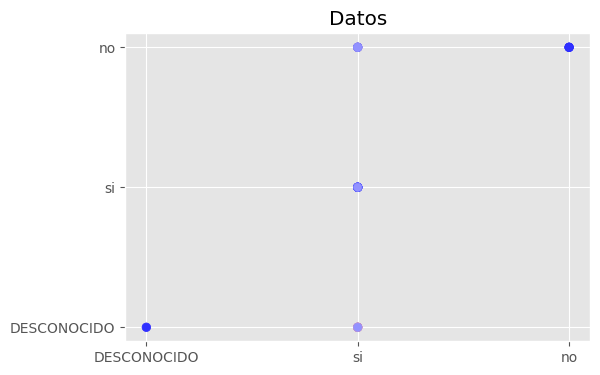

In [31]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(dataset.HTA, dataset.DIABETES, c=dataset.NIHSS_INICO_ACV);
ax.set_title("Datos");

In [32]:
round(dataset.describe(), 2)

,NIHSS_INICO_ACV
count,44.00
mean,5.66
std,4.31
min,0.00
25%,3.00
50%,5.00
75%,6.00
max,21.00


### Número de CLase

In [33]:
print(dataframe.groupby('NIHSS_INICO_ACV').size())

NIHSS_INICO_ACV
0.0     1
1.0     3
2.0     6
3.0     3
4.0     7
5.0     4
6.0     4
7.0     4
10.0    1
13.0    1
14.0    1
15.0    1
16.0    1
21.0    1
dtype: int64


# 4-. Preparar los datos para el modelo de aprendizaje automático
## Preparación de datos

Los pasos exactos para la preparación de los datos dependerán del modelo utilizado y de los datos recopilados, pero se requerirá cierta cantidad de manipulación de datos para cualquier aplicación de aprendizaje automático.

##### Codificación One-Hot

El primer paso para nosotros se conoce como codificación one-hotde los datos Este proceso toma variables categóricas, como Diabetes, y las convierte en una representación numérica sin un orden arbitrario

In [34]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)

dataset.head(5)

# Lista de características para uso posterior
features = dataset.drop('NIHSS_INICO_ACV', axis = 1)
feature_list = list(features.columns)

# 5-. Entrenar el modelo en los datos de entrenamiento

In [35]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# X son nuestras variables independientes
X = dataset.drop('NIHSS_INICO_ACV', axis = 1)

# y es nuestra variable dependiente
y = dataset['NIHSS_INICO_ACV']

# Uso de Skicit-learn para dividir datos en conjuntos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

### Creamos el modelo y entrenamos

In [46]:
from sklearn.svm import SVC

# Creación del modelo SVM lineal
svm = SVC(C = 100, kernel = 'linear', random_state=0)
svm.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=0)

Al tratarse de un problema de dos dimensiones, se puede representar las regiones de clasificación(deberia ir una grafica).

# 6-. Predicciones sobre los datos de prueba
Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test.

In [48]:
# Predicción Entrenamiento 
prediccionEntreno = svm.predict(X_train)

# Predicción Tests
prediccionTests = svm.predict(X_test)

### Generamos métricas para evaluar el modelo

## Fase de Entrenamiento

In [49]:
from sklearn import metrics

print("Entrenamiento - Accuracy :", metrics.accuracy_score(y_train, prediccionEntreno))

Entrenamiento - Accuracy : 0.3142857142857143


### Matriz de Confusión
En el campo de la inteligencia artificial y en especial en el problema de la clasificación estadística, una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

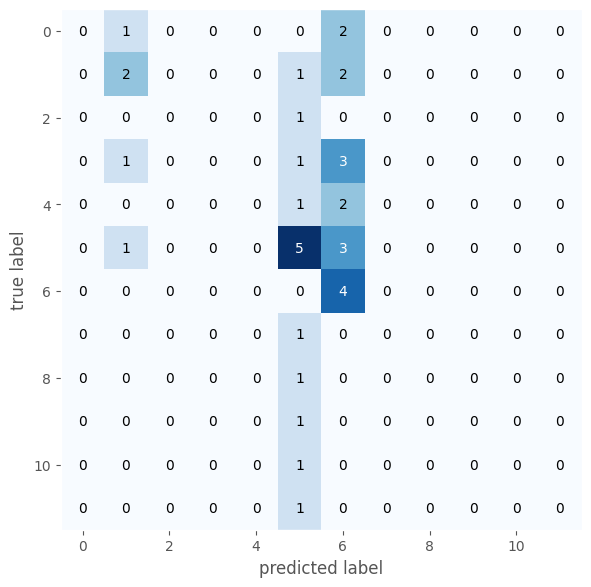

In [50]:
from matplotlib import pyplot as plot
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_train, prediccionEntreno)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plot.tight_layout()

# 7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento
## Fase de validación  (Usando datos de Test)

In [56]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = metrics.accuracy_score(
            y_true    = y_test,
            y_pred    = prediccionTests,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 0.0%


In [54]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = metrics.accuracy_score(
            y_true    = y_test,
            y_pred    = prediccionTests,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 0.0%


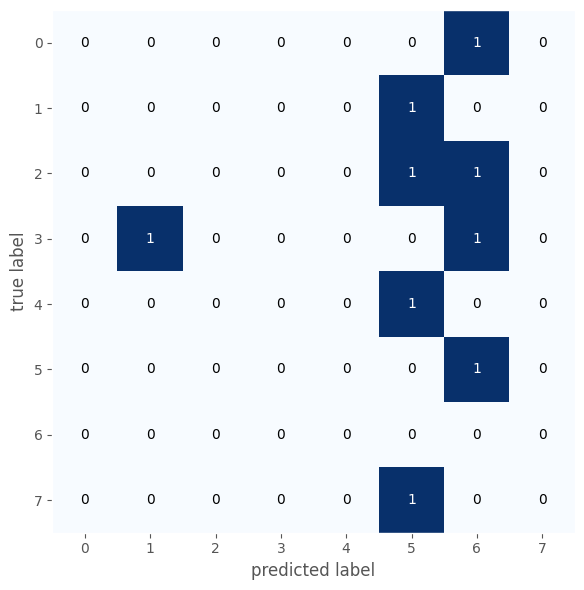

In [57]:
matriz = confusion_matrix(y_test, prediccionTests)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [58]:
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_test, prediccionTests))

Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       1.0
         2.0       0.00      0.00      0.00       1.0
         3.0       0.00      0.00      0.00       2.0
         4.0       0.00      0.00      0.00       2.0
         5.0       0.00      0.00      0.00       1.0
         6.0       0.00      0.00      0.00       1.0
         7.0       0.00      0.00      0.00       0.0
        13.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0

